# **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
import nltk
from nltk.corpus import stopwords  # for removing the impact of stop words
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

#vectorization of data take place
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Evaluation Metrices
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

#plot confusion metrics
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Importing Dataset**

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/train.txt', delimiter=';', names = ['text', 'Emotion'])  #using delimiter to split text and emotion
df_val = pd.read_csv('/content/drive/MyDrive/val.txt', delimiter=';', names = ['text', 'Emotion'])


In [6]:
df_train

,text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [7]:
df_val

,text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


# ***Concating the two data set***

In [8]:
df = pd.concat([df_train , df_val])
df.reset_index(inplace = True , drop= True)

In [9]:
df.head()

,text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
df.tail()

,text,Emotion
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy
17999,i feel like i just wanna buy any cute make up ...,joy


In [11]:
df.sample(5) #random selecting sample

,text,Emotion
12193,i feel even more beaten down without the encou...,sadness
3692,i am a bit of a romantic so i really feel like...,sadness
7633,i feel joyful inside,joy
6936,i cant tell you the joy i was feeling as i hel...,joy
1516,i feel whos work is worthwhile in this world a...,joy


In [12]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [13]:
df.Emotion.value_counts()  #Strength of each category

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: Emotion, dtype: int64

<Axes: >

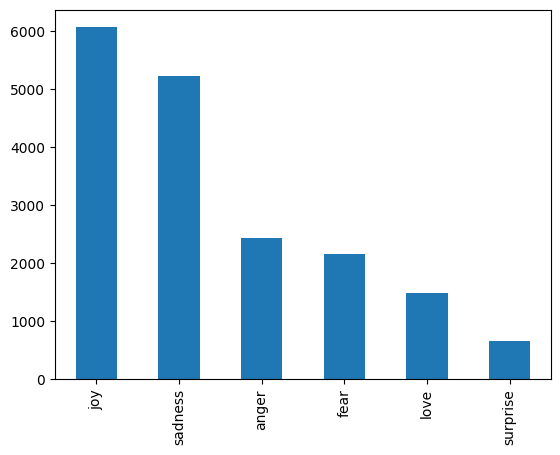

In [14]:
df.Emotion.value_counts().plot.bar()

In [15]:
#From this bar grapgh we get to know ... Joy has most occurence while Surprise has least
#Positive Sentiments  = Joy ,Love , Surprise ....Replace as 1
#Negative Sentiment = Fear ,Sadness ,Anger ..... Replace as 0


In [16]:
df['Emotion'].replace(to_replace = ['joy','love','surprise'] , value = 1 , inplace = True)
df['Emotion'].replace(to_replace = ['sadness','anger','fear'] , value = 0 , inplace = True)

In [17]:
df

,text,Emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
...,...,...
17995,im having ssa examination tomorrow in the morn...,0
17996,i constantly worry about their fight against n...,1
17997,i feel its important to share this info for th...,1
17998,i truly feel that if you are passionate enough...,1


<Axes: >

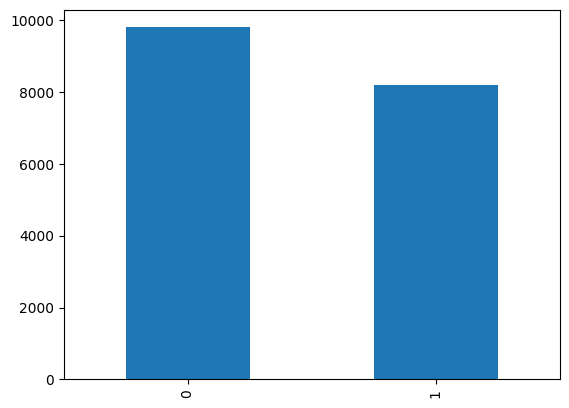

In [18]:
df.Emotion.value_counts().plot.bar() # Negative sentiments is more than Positive sentiments

# **Preprocessing the text column**

In [19]:
lm  = WordNetLemmatizer()

In [20]:
def transformation(df_column):
  output = []
  for i in df_column:
    new_text = re.sub('[^a-zA-Z]', ' ', str(i)) #if not this character present delete and include space....
    new_text = new_text.lower()
    new_text = new_text.split()  #spliting for white space
    new_text = [lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]#list comprehensing for preprocessing text by removing stopwords and lemmatize the text
    output.append(' '.join(str(k) for k in new_text))  #joijn the text

  return output

In [21]:
var = transformation(df.text)

In [22]:
var #op after removing stop words and lemmmetaizing text

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [23]:
#wordcloud form of data visulizatuion to check most repeat words
plt.figure(figsize=(20,8))
word = ''
for i in var:
  for j in i:
    word += ' '.join(j)





<Figure size 2000x800 with 0 Axes>

In [24]:
word

'didnt feel humiliatedgo feeling hopeless damned hopeful around someone care awakeim grabbing minute post feel greedy wrongever feeling nostalgic fireplace know still propertyfeeling grouchyive feeling little burdened lately wasnt sureive taking milligram time recommended amount ive fallen asleep lot faster also feel like funnyfeel confused life teenager jaded year old manpetronas year feel petronas performed well made huge profitfeel romanticfeel like make suffering seeing mean somethingfeel running divine experience expect type spiritual encounterthink easiest time year feel dissatisfiedfeel low energy thirstyimmense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little preciousfeel reassured anxiety sidedidnt really feel embarrassedfeel pretty pathetic timestarted feeling sentimental doll child began collection vintage barbie doll sixtyfeel compromised skeptical value every unit work putfeel irritated rej

In [25]:
from wordcloud import WordCloud

In [26]:
wc = WordCloud(width = 1000, height=500 , background_color='white' , min_font_size=10).generate(word)

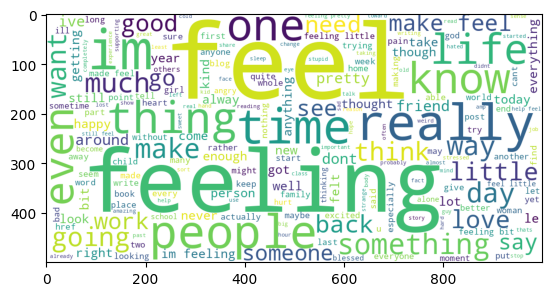

In [27]:
plt.imshow(wc)

In [28]:
cv = CountVectorizer(ngram_range = (1,2))
traindata = cv.fit_transform(var)
X_train = traindata
Y_train  = df.Emotion

# ***Model Training***

In [29]:
model = RandomForestClassifier()

In [30]:
#hyper parameter tuning
parameters = { 'max_features' : ('auto', 'sqrt'),
              'n_estimators'  : [500 ,1000 , 1500],
               'max_depth'  : [5 ,10 ,None],
               'min_samples_leaf': [1, 2, 5 , 10],
               'min_samples_split':[5,10,15],
               'bootstrap': [True , False]}

In [31]:
grid_search = GridSearchCV(model,
                           parameters,
                           cv=5,
                           return_train_score = True,
                           n_jobs = 1)

In [ ]:
grid_search.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
grid_search.best_params_

In [ ]:
rfc = RandomForestClassifier(max_features = grid_search.best_params_['maz_features'],
                             n_estimators = grid_search.best_params_['n_estimators'],
                             max_depth = grid_search.best_params_['max_depth'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             min_samples_split = grid_search.best_params_['min_samples_split'],
                             bootstrap = grid_search.best_params_['bootstrap'],)

In [ ]:
rfc.fit(X_train , Y_train)

In [ ]:
test_data =
X_test , Y_test

In [ ]:
Y_pred = rfc.predict(X_test)

In [ ]:
def sentimental_analysis(input):
  new_input = tranformation(input)
  transformed_input  = cv.transform(new_input)
  prediction = rfc.predict(transformed_input)
  if prediction == 0:
    print('Negative Sentiment')
  elif prediction == 1:
    print('Positive Sentiment')
  else:
    print('Invalid Sentiment')


In [ ]:
input = 'Today  I was palying in the park and I fell'
inp = input('')

In [ ]:
sentimental_analysis(inp)